In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [3]:
## Step 1: Load and Preprocess Data
# Load training and test datasets
df_train = pd.read_csv('trainset.csv')
df_test = pd.read_csv('testset.csv')

In [4]:
# Use closing prices
train_prices = df_train['Close'].values.reshape(-1, 1)
test_prices = df_test['Close'].values.reshape(-1, 1)

In [5]:
# Normalize the data based on training set only
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_prices)
scaled_test = scaler.transform(test_prices)

In [6]:
# Create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(scaled_train, seq_length)
x_test, y_test = create_sequences(scaled_test, seq_length)


In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1199, 60, 1), (1199, 1), (65, 60, 1), (65, 1))

In [8]:
# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [9]:
# Create dataset and dataloader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [14]:
# Define RNN Model
class RNNModel(nn.Module):
  def __init__(self,input_size=1,hidden_size=64,num_layers=2,output_size=1):
    super(RNNModel,self).__init__()
    self.rnn=nn.RNN(input_size,hidden_size,num_layers,batch_first=True)
    self.fc=nn.Linear(hidden_size,output_size)

  def forward(self,x):
    out,_=self.rnn(x)
    out=self.fc(out[:,-1,:])
    return out


model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


# Train the Model
epochs=20
model.train()
train_loss=[]
for epoch in range(epochs):
  epoch_loss=0
  for x_batch,y_batch in train_loader:
    x_batch,y_batch=x_batch.to(device),y_batch.to(device)
    optimizer.zero_grad()
    outputs=model(x_batch)
    loss=criterion(outputs,y_batch)
    loss.backward()
    optimizer.step()
    epoch_loss+=loss.item()
  train_loss.append(epoch_loss/len(train_loader))
  print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_loss[-1]:.4f}")

Epoch [1/20], Loss: 0.1638
Epoch [2/20], Loss: 0.0738
Epoch [3/20], Loss: 0.0539
Epoch [4/20], Loss: 0.0535
Epoch [5/20], Loss: 0.0555
Epoch [6/20], Loss: 0.0498
Epoch [7/20], Loss: 0.1065
Epoch [8/20], Loss: 0.0560
Epoch [9/20], Loss: 0.0509
Epoch [10/20], Loss: 0.0428
Epoch [11/20], Loss: 0.0259
Epoch [12/20], Loss: 0.0059
Epoch [13/20], Loss: 0.0016
Epoch [14/20], Loss: 0.0011
Epoch [15/20], Loss: 0.0015
Epoch [16/20], Loss: 0.0016
Epoch [17/20], Loss: 0.0007
Epoch [18/20], Loss: 0.0005
Epoch [19/20], Loss: 0.0005
Epoch [20/20], Loss: 0.0004


Name:Dhivya Dharshini B                 
Register Number:212223240031


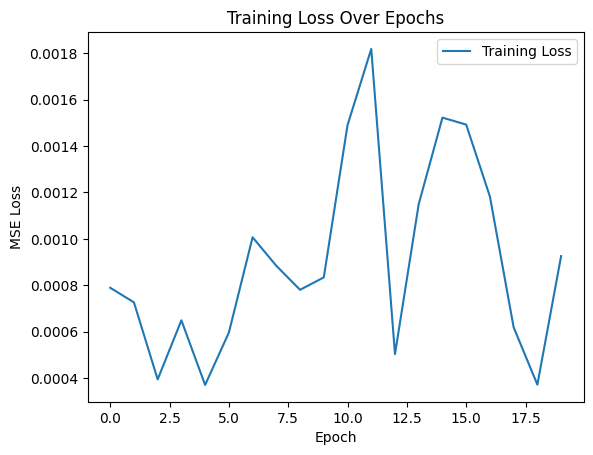

In [19]:
# Plot training loss
print('Name:Dhivya Dharshini B                 ')
print('Register Number:212223240031')
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


Name:Dhivya Dharshini B
Register Number:212223240031


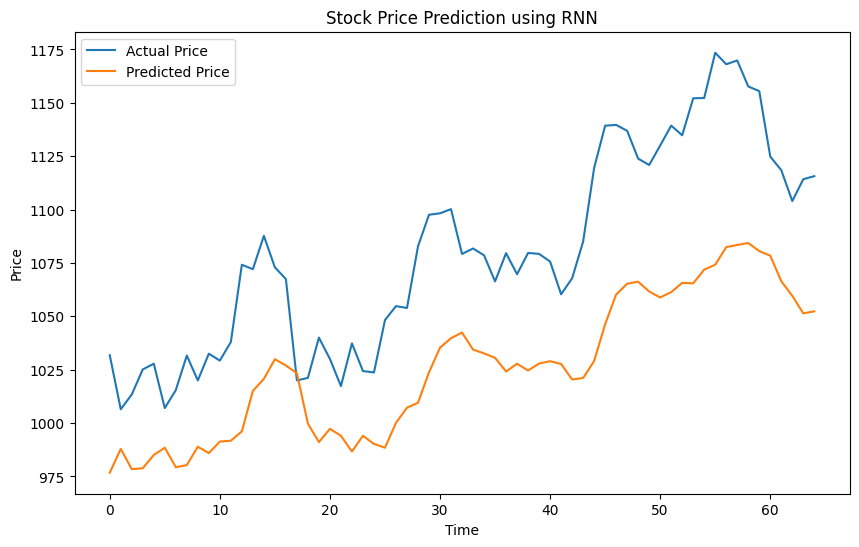

Predicted Price: [1052.3435]
Actual Price: [1115.65]


In [21]:
## Step 4: Make Predictions on Test Set
model.eval()
with torch.no_grad():
    predicted = model(x_test_tensor.to(device)).cpu().numpy()
    actual = y_test_tensor.cpu().numpy()

# Inverse transform the predictions and actual values
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(actual)

# Plot the predictions vs actual prices
print('Name:Dhivya Dharshini B')
print('Register Number:212223240031')
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction using RNN')
plt.legend()
plt.show()
print(f'Predicted Price: {predicted_prices[-1]}')
print(f'Actual Price: {actual_prices[-1]}')